In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv("kyphosis.csv")

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [5]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


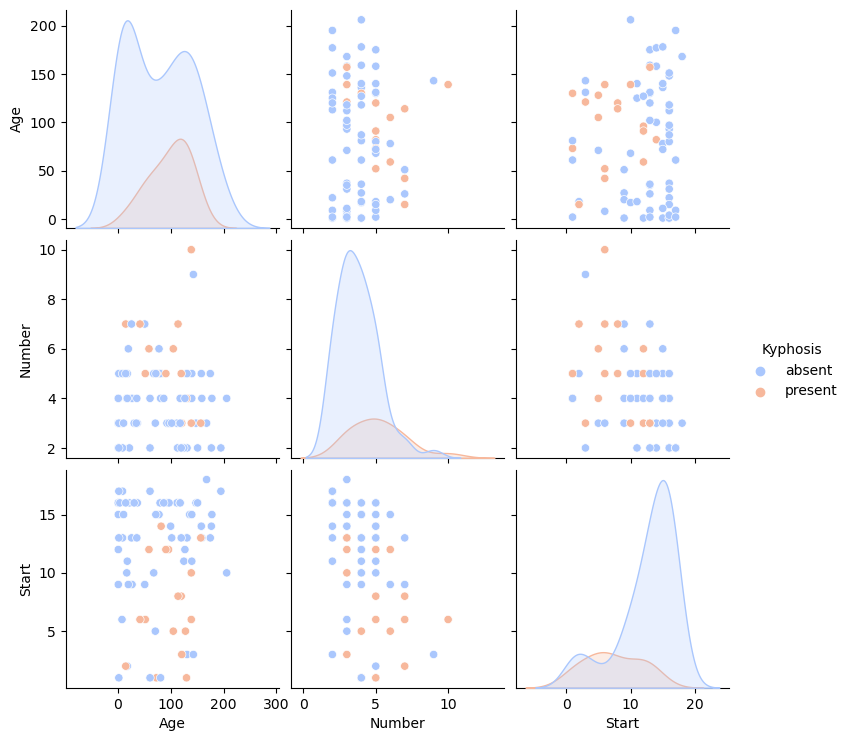

In [7]:
sns.pairplot(df, hue = "Kyphosis", palette = "coolwarm")

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop("Kyphosis", axis = 1)

In [10]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [11]:
y = df["Kyphosis"]

In [12]:
y

0      absent
1      absent
2     present
3      absent
4      absent
       ...   
76    present
77     absent
78     absent
79    present
80     absent
Name: Kyphosis, Length: 81, dtype: object

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dtree = DecisionTreeClassifier()

In [23]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
predictions = dtree.predict(X_test)

In [40]:
predictions

array(['absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present'], dtype=object)

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [26]:
print(confusion_matrix(y_test, predictions))
print("\n")
print(classification_report(y_test, predictions))

[[19  2]
 [ 3  1]]


              precision    recall  f1-score   support

      absent       0.86      0.90      0.88        21
     present       0.33      0.25      0.29         4

    accuracy                           0.80        25
   macro avg       0.60      0.58      0.58        25
weighted avg       0.78      0.80      0.79        25



In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc = RandomForestClassifier(n_estimators=200)

In [43]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [44]:
rfc_pred = rfc.predict(X_test)

In [45]:
rfc_pred

array(['absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent', 'absent', 'present', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [46]:
print(confusion_matrix(y_test, rfc_pred))
print("\n")
print(classification_report(y_test, rfc_pred))

[[19  2]
 [ 3  1]]


              precision    recall  f1-score   support

      absent       0.86      0.90      0.88        21
     present       0.33      0.25      0.29         4

    accuracy                           0.80        25
   macro avg       0.60      0.58      0.58        25
weighted avg       0.78      0.80      0.79        25



In [49]:
df["Kyphosis"].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64